# Web Scraping NFL data

 This is a project going over some basic web scraping techniques and methods applied to 
 collect, clean and analyze NFL fantasy football data
 
 ### Learning Objectives
     1. Finding a good data source and check if site allows for automatic data collection of data
     2. Inspect HTML code of the page we want to get our data from and see where it
     is embedded in the webpage
     3. Scrape/collect the data from the website that we want
     4. Explore the unfiltered messy data and get familiar with data
     5. Clean and prepare the messy data and store it into table
     6. Run some basic stats on data
     7. Visualizations 
     8. Clustering 
     9. Predictions

## Part 1: Sourcing Data and Data Usage Policies 

- Finding online data source
- Checking site policies on data collection 
- Basics to extracting data from HTML webpage    

In [1]:
# Let's import the packages we will need to use for this project
# You can use other packages if you'd like but for now these will do 



import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datascience import *
import pandas as pd
import lxml.html as lh
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### Finding a data source online: 
- It is not very difficult to find a dataset online these days and many of them are full of useful data and can be cleaned relativley easily, but more often than not cleaning data is an arduous task and thus it is best to learn with a rather clean data set first! That is why we will be using pro-football-reference.com's online fantasy football data set in this project. 


### Let's check the website policies on data collection and usage
- Go to https://www.pro-football-reference.com/years/2018/fantasy.htm and look at the very bottom of the webpage for the "Use of Data" link, and the "Conditions & Terms of Service" link.
- Now go ahead and read these webpages on the site policies on its data before we move on


### Robot.txt 

This is a code that I copied from my DSC96 class at UCSD that will check if the website we wish to use prohibits webscraping via robot.txt policy so just run it! But remeber this does not gurantee you can scrape the website! So it is best to follow these guide lines:

- Don't break anything. Many rapid requests to smaller sites can overload the host server.
- Use a published API if possible - it is more robust and usually much easier!
- Respect the policy published at robots.txt
- Don't spoof your UserAgent (or try to trick the server into thinking you are a person)
- Read the Terms of Service for the site and follow it.

If you are interested in reading more about robot.txt check this site out http://www.robotstxt.org/robotstxt.html

In [2]:
# Just Run It

from urllib.parse import urlparse
import urllib.robotparser

# This code checks the robots.txt file
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

In [3]:
# Scraping Data from webstie
# First check to see if it passes robot.txt test

url = "https://www.pro-football-reference.com/years/2018/fantasy.htm"
canFetch(url)

True

* #### Let's check out the webpage to see what the HTML code looks like using the python library Requests. 
>Go to http://docs.python-requests.org/en/master/ for more information on Requests library.

In [4]:
# We use requests.get() function here  to get webpage we want 
# and assign a "Response object" to the variable r. 
# We  get the information we need from this object.
r = requests.get(url)

# Get the encoded HTML data from the webpage
urlText = r.text

Nchars = 1000
print(urlText[:Nchars]) # Print the first 500 characters
print("\n\n... " + str(len(urlText)-Nchars) + " additional characters")


<!DOCTYPE html>
<html data-version="klecko-" data-root="/home/pfr/build" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >
<head>
    <meta charset="utf-8">
    <meta http-equiv="x-ua-compatible" content="ie=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />
    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/201811271" />

<!-- no:cookie fast load the css.           -->
<link rel="preconnect" href="https://d2p3bygnnzw9w3.cloudfront.net" crossorigin>
<link rel="preconnect" href="https://d395i9ljze9h3x.cloudfront.net" crossorigin>
 <style>html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#000}body{position:relative;background:#c9cbcd;z-index:0;-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none}a img{border:0}ul,li,ol{margin:0;padding:0;list-style-type:none}table th,table td{border:0}iframe{max-width:100%}code{ba

## Part 2: Exploration

   - Scrape/collect the data from the website that we want with BS4 and Beautifulsoup library 
   - Explore the unfiltered messy data and get familiar with data    

In [5]:
#Import from bs4 the BeautifulSoup libray 
from bs4 import BeautifulSoup

# Parse text/data from HTML webpage format and store into soup.
soup = BeautifulSoup(urlText, 'lxml')

In [6]:
# Scrape column headers
# Extract the necessary values for the column headers from the table
# and store them as a list
column_headers = [th.getText() for th in 
                  soup.findAll('tr', limit=2)[1].findAll('th')]
#column_headers

In [7]:
# Select data we want to scrape within the table rows of the element with id=fantasy
# We want the elements from the 3rd row and on
# Then store them into a list of tag elements callewd table_rows
table_rows = soup.select("#fantasy tr")[2:] 
type(table_rows)

list

In [8]:
len(table_rows[0])

33

In [9]:
some_data = table_rows[2]
type(some_data)

bs4.element.Tag

In [10]:
# Get all ranking categories
for rank in soup.find_all('th'):
    print(rank.get('data-stat'))
    



None
None
header_g
header_pass
header_rush
header_rec
header_fumbles
header_scoring
header_fantasy
ranker
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
ranker
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
ranker
ranker
ranker
ranker
ranker
rank

In [11]:
for _ in soup.find_all('td'):
    print(_.get('data-stat'))

player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
p

fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
f

rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yd

rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fum

two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_poin

pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int

fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt

rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td

pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds

rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att

pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds
rush_yds_per_att
rush_td
targets
rec
rec_yds
rec_yds_per_rec
rec_td
fumbles
fumbles_lost
all_td
two_pt_md
two_pt_pass
fantasy_points
fantasy_points_ppr
draftkings_points
fanduel_points
vbd
fantasy_rank_pos
fantasy_rank_overall
player
team
fantasy_pos
age
g
gs
pass_cmp
pass_att
pass_yds
pass_td
pass_int
rush_att
rush_yds

In [12]:
len(soup.find_all('tr')[2:])

568

## Part 3: Prepare to clean Fantasy Football data

   - Making a dictionary that stores all the columns and their data with appropriate headers
   - Storing the webpage content data into a data frame with Pandas
   - Clean the new data frame   

In [13]:
# Now we will store the data inside each rows string xml data to doc.
doc = lh.fromstring(r.content)

# We will use the xpath function of lxml library to get the text data from doc
tr_elements = doc.xpath('//tr')

In [14]:
# Looking at the website url we know that every row in data frame we want has 33 columns
# so lets make sure we got all the columns and data by checking lengths of the first 32 rows are equal to 33
# not including the first two rows of the webpage because they are not apart of data we want
[len(T) for T in tr_elements[2:34]]

[33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33]

In [15]:
# Lets get all the column headers and store them in a list for creating our dictionary later

#Create empty list
col=[]
i=0

#For each row, store each first element (header) and an empty list
for t in tr_elements[1]:
    i+=1
    name=t.text_content()
    print(i,name)
    col.append((name,[]))

1 Rk
2 Player
3 Tm
4 FantPos
5 Age
6 G
7 GS
8 Cmp
9 Att
10 Yds
11 TD
12 Int
13 Att
14 Yds
15 Y/A
16 TD
17 Tgt
18 Rec
19 Yds
20 Y/R
21 TD
22 Fmb
23 FL
24 TD
25 2PM
26 2PP
27 FantPt
28 PPR
29 DKPt
30 FDPt
31 VBD
32 PosRank
33 OvRank


In [16]:
type(name)

lxml.etree._ElementUnicodeResult

- ### Get the data from all the rows and columns with a clever loop!

In [17]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 33, the //tr data is not from our table 
    if len(T)!=33:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [18]:
# Make sure we have all the rows with data for each column, length of rows in data should be 569
[len(C) for (title,C) in col]

[569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569,
 569]

- ### Now we can make a dictionary to convert our data to a dataframe

In [19]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [20]:
# lets see what this dataframe looks like
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,FL,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,FL,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
1,1,Todd Gurley,LAR,RB,24,12,12,0,233,474,...,1,3,,283,328.9,335.9,305.9,180,1,1
2,2,Saquon Barkley,NYG,RB,21,12,12,0,195,602,...,0,1,,230,303.6,309.6,266.6,127,2,2
3,3,Alvin Kamara,NOR,RB,23,12,11,0,161,555,...,0,2,,224,288.7,294.7,256.2,121,3,3
4,4,Christian McCaffrey,CAR,RB,22,12,12,0,163,663,...,1,,,217,296.6,303.6,256.6,114,4,4


- ### Now we need some simple data cleaning before we can use our data!


     - What you will notice it that there is a bar of headers or labels for the columns that 
       will keep being repeated through each column periodically and we want to get rid of
       this. 

In [21]:
# This line right here will go through and take care of removing the repeated column headers
fantasy_df_clean = df[df['Rk']!='Rk']

# Now I want to put the data frame into a table so we can use the Datascience module library
# we have been using in DSC10
fantasy_tbl_clean = Table.from_df(fantasy_df_clean)
fantasy_tbl_clean

Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Y/A,Tgt,Rec,Y/R,Fmb,FL,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
1,Todd Gurley,LAR,RB,24,12,12,0,233,474,19,0,5.04,61,46,10.30,1,1,3,,283,328.9,335.9,305.9,180,1,1
2,Saquon Barkley,NYG,RB,21,12,12,0,195,602,12,0,4.89,91,74,8.14,0,0,1,,230,303.6,309.6,266.6,127,2,2
3,Alvin Kamara,NOR,RB,23,12,11,0,161,555,15,0,4.61,84,65,8.54,1,0,2,,224,288.7,294.7,256.2,121,3,3
4,Christian McCaffrey,CAR,RB,22,12,12,0,163,663,11,0,5.29,92,80,8.29,4,1,,,217,296.6,303.6,256.6,114,4,4
5,James Conner,PIT,RB,23,12,11,0,201,467,13,0,4.52,68,52,8.98,4,2,2,,216,267.6,275.6,241.6,113,5,5
6,Patrick Mahomes,KAN,QB,23,12,12,287,51,0,2,10,4.67,0,0,,7,2,,,333,332.7,350.7,342.7,109,1,6
7,Tyreek Hill,KAN,WR,24,12,12,0,15,1119,12,0,7.87,100,66,16.95,0,0,,,196,261.7,267.7,228.7,106,1,7
8,Ezekiel Elliott,DAL,RB,23,12,12,0,240,423,9,0,4.79,68,53,7.98,4,1,,,209,262.3,269.3,235.8,106,6,8
9,Melvin Gordon,LAC,RB,25,10,10,0,153,453,13,0,5.24,60,44,10.30,1,0,2,,208,251.5,257.5,229.5,104,7,9
10,Kareem Hunt,KAN,RB,23,11,11,0,181,378,14,0,4.55,35,26,14.54,0,0,,,204,230.2,236.2,217.2,101,8,10


 ## **But wait....there's more to do..**
 
 
 - *Let's look at the 'Age' column and then try to see how the data has been stored*

In [22]:
age = fantasy_tbl_clean.column('Age')
age

array(['24', '21', '23', '22', '23', '23', '24', '23', '25', '23', '29',
       '26', '30', '28', '28', '25', '26', '25', '26', '24', '29', '26',
       '25', '26', '27', '22', '26', '25', '33', '31', '39', '29', '26',
       '25', '36', '24', '31', '25', '33', '24', '22', '23', '23', '25',
       '29', '29', '24', '24', '24', '27', '23', '37', '32', '24', '25',
       '25', '24', '23', '30', '25', '27', '35', '30', '30', '23', '22',
       '25', '21', '24', '28', '32', '25', '24', '28', '25', '30', '28',
       '24', '24', '41', '25', '27', '37', '31', '26', '30', '23', '36',
       '26', '30', '25', '34', '33', '24', '22', '21', '23', '22', '24',
       '24', '23', '30', '24', '28', '21', '29', '26', '28', '25', '27',
       '26', '24', '21', '25', '35', '31', '32', '28', '28', '22', '30',
       '25', '21', '35', '24', '25', '24', '22', '29', '25', '23', '25',
       '24', '23', '28', '31', '23', '25', '23', '22', '25', '26', '27',
       '22', '32', '26', '28', '25', '21', '33', '3

-  *Okay so now we know that every element of this array has data stored in a string with the integer value contained inside. What we want to do is go ahead and loop through the array and type cast each individual element in order to get the data into (int) values. So lets try a simple for loop..*


In [23]:
# I am going to convert the array of strings into a list object so I can do my type casting
age_list = age.tolist()

# Now we will be going to write a loop that will take every value in age_list and convert
# the string and its value into an int type and then append that int value into the 
# new_age_list which we can convert to a numpy array.

new_age_list = []
for value in age_list:
    try:
        new_age_list.append(int(value))
    except ValueError:
        continue
# Uncomment the line below to see if this loop worked!!        
#new_age_list        

In [24]:
# Let's convert the list to a numpy array and then check if this all worked as plan!
age_clean = np.array(new_age_list)
age_clean

array([24, 21, 23, 22, 23, 23, 24, 23, 25, 23, 29, 26, 30, 28, 28, 25, 26,
       25, 26, 24, 29, 26, 25, 26, 27, 22, 26, 25, 33, 31, 39, 29, 26, 25,
       36, 24, 31, 25, 33, 24, 22, 23, 23, 25, 29, 29, 24, 24, 24, 27, 23,
       37, 32, 24, 25, 25, 24, 23, 30, 25, 27, 35, 30, 30, 23, 22, 25, 21,
       24, 28, 32, 25, 24, 28, 25, 30, 28, 24, 24, 41, 25, 27, 37, 31, 26,
       30, 23, 36, 26, 30, 25, 34, 33, 24, 22, 21, 23, 22, 24, 24, 23, 30,
       24, 28, 21, 29, 26, 28, 25, 27, 26, 24, 21, 25, 35, 31, 32, 28, 28,
       22, 30, 25, 21, 35, 24, 25, 24, 22, 29, 25, 23, 25, 24, 23, 28, 31,
       23, 25, 23, 22, 25, 26, 27, 22, 32, 26, 28, 25, 21, 33, 32, 23, 29,
       29, 25, 22, 27, 24, 22, 24, 27, 29, 28, 23, 33, 29, 26, 24, 24, 27,
       22, 25, 23, 22, 27, 26, 23, 22, 33, 30, 30, 30, 26, 26, 24, 22, 23,
       30, 24, 27, 27, 23, 26, 27, 23, 28, 24, 24, 25, 27, 34, 22, 25, 23,
       25, 30, 38, 24, 24, 30, 22, 29, 27, 25, 27, 29, 24, 25, 38, 23, 26,
       26, 28, 26, 24, 23

In [25]:
# Okay now we can do the same process as above for the target column
targets_raw = fantasy_tbl_clean.column('Tgt')

In [26]:
targets_list = targets_raw.tolist()
targets_list

new_tgt_list = []
for value in targets_list:
    try:
        new_tgt_list.append(int(value))
    except ValueError:
            continue

In [27]:
tgt_clean = np.array(new_tgt_list)
tgt_clean

array([ 61,  91,  84,  92,  68,   0, 100,  68,  60,  35, 114, 127, 135,
       134, 121, 105, 114,  88, 124,  32, 133, 103, 105,  99,  51, 119,
       113,  93,  20,  78,   1,   0,  56,  90,   1,  97,  98, 119,   0,
         0,  42,  16,  77,  92,  86,   2,  32,  71,  48,  27,  25,   0,
        70,  59,  40,  27,  73,  91,  77,  74,  54,   0,   1,  96,   0,
        67,  56,  40,  72,  83,  72,  73,  42,  56,   0,   1,  79,  17,
         0,   1,   1,   0,   0,   0,   1,   0,   1,   0,   0,   0,   1,
         0,   0,   0,   0,   0,  47,  18,  19,  21,  11,   0,  21,  24,
         0,  18, 120,  51,  76,  60,  44,  15,  56,  71,  75,  69,  69,
        13,  61,  70,  39,  71,   2,  15,  50,  29,  71,  60,  62,   0,
        14,  55,  45,  59,  65,  89,  69,  71,  37,   7,  47,  35,  76,
        36,   7,  43,   0,  67,  66,  51,  18,   0,  54,  19,  79,  69,
        16,  25,  34,  25,  43,  65,  32,  25,  62,  60,  80,  51,  35,
        20,  12,  54,  28,   8,  37,  39,  32,  40,  38,  40,  1

In [28]:
len(tgt_clean)

550

## Make a Function to Clean!!!

- If you are going to run the same process a bunch of times the best rule of thumb is to write a function that you can call! 

In [29]:
def clean_col(col_array):
    col_list = col_array.tolist()
    #print(col_list)
    new_col_list = []
    for value in col_list:
        try:
            new_col_list.append(int(value))
        except ValueError:
            new_col_list.append(-10)
            continue
    return np.array(new_col_list)
            
    

In [30]:
TD_clean = clean_col(fantasy_tbl_clean.column('TD'))

In [31]:
TD_clean

array([19, 12, 15, 11, 13,  2, 12,  9, 13, 14,  9, 11, 12,  9,  6,  8,  8,
       12,  6,  9,  3, 10,  6,  5,  8,  4,  5,  3,  8,  6,  3,  4,  9,  4,
        3,  6,  5,  6,  2,  1,  6,  9,  6,  5,  6,  0,  8,  8,  5,  4,  5,
        0,  5,  8,  7,  6,  4,  4,  6,  5,  5,  0,  0,  4,  2,  5,  6,  4,
        4,  2,  2,  5,  7,  3,  0,  1,  4,  4,  3,  2,  5,  1,  0,  0,  0,
        0,  0,  2,  1,  1,  2,  1,  0,  1,  4,  1,  4,  5,  5,  5,  5,  0,
        8,  5,  0,  5,  2,  2,  3,  4,  5,  5,  2,  4,  5,  5,  3,  5,  5,
        3,  2,  4,  3,  1,  6,  4,  4,  3,  3,  1,  5,  3,  4,  3,  4,  3,
        4,  3,  5,  5,  3,  4,  2,  6,  5,  5,  0,  0,  3,  3,  3,  0,  2,
        2,  1,  3,  1,  3,  4,  2,  5,  2,  4,  4,  1,  2,  1,  2,  3,  4,
        2,  3,  4,  2,  3,  5,  1,  3,  4,  2,  1,  2,  2,  4,  2,  2,  3,
        1,  5,  0,  2,  1,  1,  2,  1,  5,  1,  2,  4,  4,  2,  1,  1,  3,
        2,  4,  2,  2,  3,  1,  4,  1,  1,  1,  0,  1,  1,  2,  2,  3,  2,
        2,  1,  1,  2,  3

-  Okay, now lets clean all the columns with integer values, but look at the website and see which columns you want to be integers value because some of the columns are going to be decimals and will need to be converted to floats. 

In [32]:
# Okay now we can see that these are the columns we want to be integer values

Int_clean = clean_col(fantasy_tbl_clean.column('Int'))
Rk_clean = clean_col(fantasy_tbl_clean.column('Rk'))
G_clean = clean_col(fantasy_tbl_clean.column('G'))
GS_clean = clean_col(fantasy_tbl_clean.column('GS'))
Cmp_clean = clean_col(fantasy_tbl_clean.column('Cmp'))
Att_clean = clean_col(fantasy_tbl_clean.column('Att'))
Yds_clean = clean_col(fantasy_tbl_clean.column('Yds'))
Rec_clean = clean_col(fantasy_tbl_clean.column('Rec'))
Fmb_clean = clean_col(fantasy_tbl_clean.column('Fmb'))
FL_clean = clean_col(fantasy_tbl_clean.column('FL'))

- Now we that we have the columns we want to be int values, we need to write a function like before but type cast float values we want, so let's do it!

In [33]:
def clean_col_float(col_array):
    col_list = col_array.tolist()
    #print(col_list)
    new_col_list = []
    for value in col_list:
        try:
            new_col_list.append(float(value))
        except ValueError:
            new_col_list.append(-1)
            continue
    return np.array(new_col_list)

- For this project I am concerned in only three columns with float values: 

    1. Yards per reception or Y/R
    2. Yards per rush attempt or Y/A
    3. Fantasy scoring format PPR

In [34]:
YR_clean = clean_col_float(fantasy_tbl_clean.column('Y/R'))
YA_clean = clean_col_float(fantasy_tbl_clean.column('Y/A'))
PPR_clean = clean_col_float(fantasy_tbl_clean.column('PPR'))

-  Put all the cleaned data into a table

In [35]:
fantasy = Table().with_columns('Rk',Rk_clean, 'Player',fantasy_tbl_clean.column('Player'),
                             'Tm', fantasy_tbl_clean.column('Tm'), 'Pos', fantasy_tbl_clean.column('FantPos'),
                             'Age', age_clean, 'G', G_clean, 'GS', GS_clean, 'Cmp', Cmp_clean, 'Att', Att_clean,
                             'Yds', Yds_clean, 'TD', TD_clean, 'Int', Int_clean, 'Y/A', YA_clean, 'Tgt', tgt_clean,
                             'Rec', Rec_clean, 'Y/R', YR_clean, 'Fmb', Fmb_clean, 'FL', FL_clean, '2PM', fantasy_tbl_clean.column('2PM'),
                             '2PP', fantasy_tbl_clean.column('2PP'), 'PPR', PPR_clean)

- Now we finally have our cleaned data in a table!

In [36]:
fantasy

Rk,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,TD,Int,Y/A,Tgt,Rec,Y/R,Fmb,FL,2PM,2PP,PPR
1,Todd Gurley,LAR,RB,24,12,12,0,233,474,19,0,5.04,61,46,10.3,1,1,3,,328.9
2,Saquon Barkley,NYG,RB,21,12,12,0,195,602,12,0,4.89,91,74,8.14,0,0,1,,303.6
3,Alvin Kamara,NOR,RB,23,12,11,0,161,555,15,0,4.61,84,65,8.54,1,0,2,,288.7
4,Christian McCaffrey,CAR,RB,22,12,12,0,163,663,11,0,5.29,92,80,8.29,4,1,,,296.6
5,James Conner,PIT,RB,23,12,11,0,201,467,13,0,4.52,68,52,8.98,4,2,2,,267.6
6,Patrick Mahomes,KAN,QB,23,12,12,287,51,0,2,10,4.67,0,0,-1,7,2,,,332.7
7,Tyreek Hill,KAN,WR,24,12,12,0,15,1119,12,0,7.87,100,66,16.95,0,0,,,261.7
8,Ezekiel Elliott,DAL,RB,23,12,12,0,240,423,9,0,4.79,68,53,7.98,4,1,,,262.3
9,Melvin Gordon,LAC,RB,25,10,10,0,153,453,13,0,5.24,60,44,10.3,1,0,2,,251.5
10,Kareem Hunt,KAN,RB,23,11,11,0,181,378,14,0,4.55,35,26,14.54,0,0,,,230.2


In [37]:
# Let's see what Todd Gurley's mean YDS

In [38]:
def cluster_scores(data_arr):
    '''
    input a numpy nd.array of data
    returns cluster quality scores of using 1,2,..,9 clusters
    '''
    scores = []
    for i in np.arange(1, 10):
        score = KMeans(n_clusters=i).fit(data_arr).score(data_arr)
        scores.append(score)
    return scores

In [39]:
clustering_features = fantasy.drop('Rk', 'Player', 'Pos', 'Tm','2PM','2PP')

scores = cluster_scores(clustering_features.values)

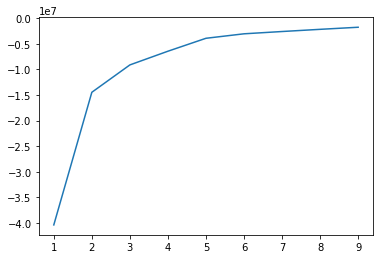

In [40]:
plt.plot(np.arange(1, 10), scores);